python 3219
python 运维 716
python 测试 888
python 数据 2347
python web 695


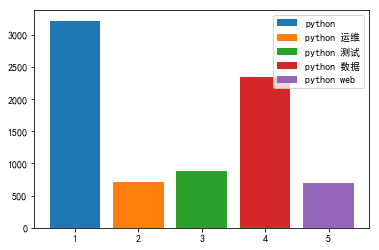

In [10]:
# 这属于直接调用浏览器进行爬取
# import urllib2 #python3中将urllib和urllib2合并了，用下面的方式使用
# 网页屏蔽 服务器屏蔽
# coding:utf-8
import matplotlib
import matplotlib.pyplot as plt #数据可视化
import selenium #网页测试框架
# import selenium.webdriver #模拟浏览器
from selenium import webdriver
import re

matplotlib.rcParams["font.sans-serif"] = ["simhei"] #配置字体
matplotlib.rcParams["font.family"] = "sans-serif"
def getnumberbyname(searchname):
    url = "https://search.51job.com/list/030200,000000,0000,00,9,99,"+searchname+",2,1.html?lang=c&stype=&postchannel=0000&workyear=99&cotype=99&degreefrom=99&jobterm=99&companysize=99&providesalary=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare="
    driver = webdriver.Firefox()
    driver.get(url) #访问链接
    pagesource = driver.page_source #抓取网页源代码
    restr = '<div class="rt">([\S\s]*?)</div>'
    regex = re.compile(restr, re.IGNORECASE)
    mylist = regex.findall(pagesource)
    driver.close() #关闭
    newstr = mylist[0].strip()
    restr2 = '共(\\d+)条职位'
    regex2 = re.compile(restr2, re.IGNORECASE)
    mylist2 = regex2.findall(newstr)
    if len(mylist2) == 0:
        print("失败")
    else:
        return mylist2[0]

pythonlist = [u"python", u"python 运维", u"python 测试", u"python 数据", u"python web"]
num = 0
for pystr in pythonlist:
    num += 1
    print(pystr, getnumberbyname(pystr))
    plt.bar([num], eval(getnumberbyname(pystr)), label=pystr)
plt.legend() #表示绘制图片
plt.show() #展示图片

In [8]:
# encoding:utf-8
import selenium #网页测试框架
from selenium import webdriver #模拟浏览器
import re

def getnumberbyname(searchname):
    url = "http://sou.zhaopin.com/jobs/searchresult.ashx?j1=%E6%B7%B1%E5%9C%B3&kw="+searchname+"&p=1&isadv=0"
    driver = webdriver.Firefox()
    driver.get(url) #访问链接
    pagesource = driver.page_source #抓取网页源代码
    restr = "<em>(\\d+)</em>" #正则表达式，()只要括号内的数据
    regex = re.compile(restr, re.IGNORECASE)
    mylist = regex.findall(pagesource)
    driver.close() #关闭
    return mylist[0]

print(getnumberbyname("python"))
num = eval(getnumberbyname("python"))
if num%60 == 0:
    pages = num//60
else:
    pages = num//60+1
    
mylist = ["http://sou.zhaopin.com/jobs/searchresult.ashx?j1=%E6%B7%B1%E5%9C%B3&kw=python&isadv=0&sg=64a3086a365945f8bbb56752adbbddd7&p="+str(i) for i in range(1, pages+1)]
for line in mylist:
    print(line)

IndexError: list index out of range

In [2]:
# encoding:utf-8
import selenium #网页测试框架
from selenium import webdriver #模拟浏览器
import urllib
from urllib.parse import quote,unquote
import re
mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 13)]
for line in mylist:
    print(line)

https://sou.zhaopin.com/?p=1&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=2&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=3&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=4&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=5&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=6&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=7&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=8&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=9&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=10&jl=489&kw=python&kt=3
https://sou.zhaopin.com/?p=11&jl=489&kw=python&kt=3


In [77]:
# 以这种模拟浏览器（并不是真的打开浏览器执行）形式抓的内容跟在网页上的源码有些出入，少了有些div里的内容
import selenium #网页测试框架
from selenium import webdriver
import urllib
from urllib.parse import quote,unquote
import re
def download(url):
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
    request = urllib.request.Request(url, headers=header)
    request.add_header("Connection", "keep-live")
    response = urllib.request.urlopen(request)
    pagesource = response.read().decode('utf-8')
    print(pagesource)
    restr = "<div id=\"listContent\" class=\"contentpile_content\">([\S\s]*?)</div>"
    regex = re.compile(restr, re.IGNORECASE)
    mylist = regex.findall(pagesource)
    print(mylist)
    newstr = mylist[0].strip()
    print(newstr)

# mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 12)]
# for line in mylist:
download("https://sou.zhaopin.com/?p=2&jl=489&kw=python&kt=3")

<!DOCTYPE html>
<html>
<head>
<meta name="renderer" content="webkit">
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<title>招聘（求职）尽在智联招聘</title>
<meta http-equiv="Cache-Control" content="no-transform" />
<meta http-equiv="Cache-Control" content="no-siteapp" />
<meta name="description" content="智联招聘为您提供全国招聘信息,与全国相关的工作尽在智联招聘" />
<meta name="keywords" content="全国招聘,全国招聘信息" />

<link rel="stylesheet" href="//desktop-bucket.zhaopin.cn/vendors.902088.css"><link rel="stylesheet" href="//desktop-bucket.zhaopin.cn/index.5e9f0e.css">
<script>
(function(a,e,f,g,b,c,d){a.ZhaoPinBigdataAnalyticsObject=b;a[b]=a[b]
||function(){(a[b].q=a[b].q||[]).push(arguments)};a[b].l=1*new Date;
a._ATAD_GIB_NIPOAHZ_||(c=e.createElement(f),d=e.getElementsByTagName(f)[0],
c.async=1,c.src=g,d.parentNode.insertBefore(c,d),a._ATAD_GIB_NIPOAHZ_=!0)})
(window,document,"script",document.location.protocol+
"//statistic.zhaopin.cn/sdk/zhaopin_tracker.js","za");
za("creat", "A23"); 
</script>
<script>var zpP

IndexError: list index out of range

In [76]:
# 以这种打开浏览器然后执行的方式可以抓取到网页完整源码的内容，不会少DIV里的内容
import selenium #网页测试框架
from selenium import webdriver
import urllib
from urllib.parse import quote,unquote
import re
def download(url):
#     url = url
#     header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
    driver = webdriver.Firefox()
    driver.get(url) #访问链接
    pagesource = driver.page_source #抓取网页源代码
#     request = urllib.request.Request(url, headers=header)
#     request.add_header("Connection", "keep-live")
#     response = urllib.request.urlopen(request)
#     pagesource = response.read().decode('utf-8')
    print(pagesource)
    restr = "<div id=\"listContent\" class=\"contentpile_content\">([\S\s]*?)</div>"
    regex = re.compile(restr, re.IGNORECASE)
    mylist = regex.findall(pagesource)
    print(mylist)
    driver.close() #关闭
    newstr = mylist[0].strip()
    print(newstr)

# mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 12)]
# for line in mylist:
download("https://sou.zhaopin.com/?p=2&jl=489&kw=python&kt=3")

<html><head>
<meta name="renderer" content="webkit">
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<title>招聘（求职）尽在智联招聘</title>
<meta http-equiv="Cache-Control" content="no-transform">
<meta http-equiv="Cache-Control" content="no-siteapp">
<meta name="description" content="智联招聘为您提供全国招聘信息,与全国相关的工作尽在智联招聘">
<meta name="keywords" content="全国招聘,全国招聘信息">

<link rel="stylesheet" href="//desktop-bucket.zhaopin.cn/vendors.902088.css"><link rel="stylesheet" href="//desktop-bucket.zhaopin.cn/index.5e9f0e.css">
<script src="https://hm.baidu.com/hm.js?38ba284938d5eddca645bb5e02a02006"></script><script async="" src="https://statistic.zhaopin.cn/sdk/sa/1.12.6/sa.min.js" charset="UTF-8"></script><script async="" src="https://statistic.zhaopin.cn/sdk/zhaopin_tracker.js"></script><script>
(function(a,e,f,g,b,c,d){a.ZhaoPinBigdataAnalyticsObject=b;a[b]=a[b]
||function(){(a[b].q=a[b].q||[]).push(arguments)};a[b].l=1*new Date;
a._ATAD_GIB_NIPOAHZ_||(c=e.createElement(f),d=e.getElementsByTag

IndexError: list index out of range

In [3]:
import requests as rq

In [1]:
from selenium import webdriver
url = "https://sou.zhaopin.com/?p=1&jl=489&kw=python&kt=3"
driver = webdriver.Firefox()
driver.get(url) #访问链接
pagesource = driver.page_source
driver.close() #关闭

In [2]:
from bs4 import BeautifulSoup

In [4]:
soup = BeautifulSoup(pagesource, "lxml")

In [42]:
tmp = []
for content in soup.find_all(id="listContent"):
    tmp.append((content.find_all(class_="contentpile__content__wrapper")))

In [7]:
tmp = soup.find_all(class_="contentpile__content__wrapper")

In [5]:
tmp2 = soup.find_all(class_="contentpile__content__wrapper__item__info")

In [13]:
i = 0
for tmp1 in tmp2:
    i += 1
    print(tmp1['href'])
print("    %d" %(i))

https://jobs.zhaopin.com/CC675886524J00248602905.htm
https://jobs.zhaopin.com/CC131287339J00185755506.htm
https://jobs.zhaopin.com/CC131287339J00185757706.htm
https://jobs.zhaopin.com/CC233479187J00104238815.htm
https://jobs.zhaopin.com/CC701919925J00105123612.htm
https://jobs.zhaopin.com/CC193042316J00068216208.htm
https://jobs.zhaopin.com/CC479611230J00103638609.htm
https://jobs.zhaopin.com/CC570072528J00133430905.htm
https://jobs.zhaopin.com/462299310250463.htm
https://jobs.zhaopin.com/CC191927912J00110666908.htm
https://jobs.zhaopin.com/CZ552829620J00064894105.htm
https://jobs.zhaopin.com/144929656250035.htm
https://jobs.zhaopin.com/CZ826522260J00216060903.htm
https://jobs.zhaopin.com/CZ899136710J00012896308.htm
https://jobs.zhaopin.com/120765843250865.htm
https://jobs.zhaopin.com/CC515513881J00244731405.htm
https://jobs.zhaopin.com/120072236251467.htm
https://jobs.zhaopin.com/CZ697762580J00116595203.htm
https://jobs.zhaopin.com/CC131332775J00116079306.htm
https://jobs.zhaopin.com/

In [50]:
tmp[0].find_all(class_="contentpile__content__wrapper__item__info__box__jobname__title")[0]['title']

'技术经理'

In [18]:
tmp[0].find_all(class_="contentpile__content__wrapper__item__info__box__cname__title")[0].string

'杭州市钱江新城投资集团有限公司'

In [10]:
tmp[0].find_all(class_="contentpile__content__wrapper__item__info__box__job__demand__item")[0].string

'杭州'

In [56]:
tmp[2].find_all(class_="contentpile__content__wrapper__item__info__box__job__saray")[0].string

'10K-15K'

In [13]:
tmp

[<div class="contentpile__content__wrapper clearfix"><!-- --> <div class="contentpile__content__wrapper__item clearfix"><a class="contentpile__content__wrapper__item__info" href="https://jobs.zhaopin.com/CC675886524J00248602905.htm" target="_blank" zp-stat-funczone="401901" zp-stat-id="jd_click" zp-stat-jdno="CC675886524J00248602905" zp-stat-pagelim="90" zp-stat-pageno="1" zp-stat-pos="0" zp-stat-track="jd_click"><div class="contentpile__content__wrapper__item__info__box contentpile__content__wrapper__item__info__box--name itemBox nameBox"><div class="contentpile__content__wrapper__item__info__box__jobname jobName"><span class="contentpile__content__wrapper__item__info__box__jobname__title" title="技术经理">技术经理</span> <span class="contentpile__content__wrapper__item__info__box__jobname__sale"></span> <!-- --></div> <div class="contentpile__content__wrapper__item__info__box__cname commpanyName"><img alt="" class="contentpile__content__wrapper__item__info__box__cname__viplevel is_vipLevel" 

In [17]:
# 以这种打开浏览器然后执行的方式可以抓取到网页完整源码的内容，不会少DIV里的内容
import selenium #网页测试框架
from selenium import webdriver
import urllib
from urllib.parse import quote,unquote
import re
def download(url):
#     url = url
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
#     driver = webdriver.Firefox()
#     driver.get(url) #访问链接
#     pagesource = driver.page_source #抓取网页源代码
    request = urllib.request.Request(url, headers=header)
    request.add_header("Connection", "keep-live")
    response = urllib.request.urlopen(request)
    pagesource = response.read().decode('utf-8')
    print(pagesource)
    restr = "<div id=\"listContent\" class=\"contentpile_content\">([\S\s]*?)</div>"
    regex = re.compile(restr, re.IGNORECASE)
    mylist = regex.findall(pagesource)
    print(mylist)
    driver.close() #关闭
    newstr = mylist[0].strip()
    print(newstr)

# mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 12)]
# for line in mylist:
download("https://jobs.zhaopin.com/CC504743337J00184553602.htm")

<!DOCTYPE html>
<html lang="cn">
<head>
<meta charset="UTF-8" />
<meta name="keywords" content="" />
<meta http-equiv="Cache-Control" content="no-transform" />
<meta http-equiv="Cache-Control" content="no-siteapp" />
<meta name="description" content="凯思联创(成都)软件技术有限公司诚聘python开发工程师3人，工作地点位于成都，薪资待遇6001-8000元/月，学历要求大专或以上，工作经验1-3年等更多招聘信息请点击查看详情【智联招聘,为您提供靠谱的人才招聘信息】" />
<title>【python开发工程师_凯思联创(成都)软件技术有限公司人才招聘信息】 - 智联招聘</title>
<link rel="stylesheet" href="//img04.zhaopin.cn/job-site/css/reset.css">
<link rel="stylesheet" href="//img04.zhaopin.cn/job-site/css/common.css">
<link rel="stylesheet" href="//img04.zhaopin.cn/job-site/css/font/iconfont-new.css">
<meta name="mobile-agent" content="format=html5; url=//m.zhaopin.com/jobs/CC504743337J00184553602/" />
<link rel="alternate" media="only screen and(max-width: 640px)" href="//m.zhaopin.com/jobs/CC504743337J00184553602/">
<link type="text/css" rel="stylesheet" href="//img04.zhaopin.cn/job-site/css/terminalpage.css?version=20171016">
<link typ

InvalidSessionIdException: Message: Tried to run command without establishing a connection


In [114]:
import urllib
from urllib.parse import quote,unquote
import re
def download(url):
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
    request = urllib.request.Request(url, headers=header)
    request.add_header("Connection", "keep-live")
    response = urllib.request.urlopen(request)
    source = response.read().decode('utf-8')
    return source
# for line in mylist:
# pagesource = download("https://jobs.zhaopin.com/CC504743337J00184553602.htm")
pagesource = download("https://jobs.zhaopin.com/CC504743337J00184553602.htm")


In [115]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pagesource, "lxml")
job_ask = soup.find_all(class_="pos-ul")
print(job_ask)

[<div class="pos-ul">
<span style="color: rgb(0, 0, 0); font-family: 'Microsoft YaHei UI'; font-size: 14px; font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: 21px; orphans: auto; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 1; word-spacing: 0px; -webkit-text-stroke-width: 0px; display: inline !important; float: none; background-color: rgb(255, 255, 255);">PYTHON开发  招聘数量：1</span><br style="color: rgb(0, 0, 0); font-family: 'Microsoft YaHei UI'; font-size: 14px; font-style: normal; font-variant: normal; font-weight: normal; letter-spacing: normal; line-height: 21px; orphans: auto; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 1; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255);"/><br style="color: rgb(0, 0, 0); font-family: 'Microsoft YaHei UI'; font-size: 14px; font-style: normal; font-variant: normal; font-weight: 

In [120]:
# print(job_ask[0].find_all(class_='js_message_plain ng-binding'))
if job_ask[0].children:
#     print(job_ask[0].find_all('span'))
#     for child in job_ask[0].children:
#         print(child)
    if job_ask[0].find_all('span'):
        for child in job_ask[0].find_all('span'):
            print(child.string)
    elif job_ask[0].find_all('p'):
        for child in job_ask[0].find_all('p'):
            print(child.string)
    elif job_ask[0].find_all('div'):
        for child in job_ask[0].find_all('div'):
            print(child.string)

#     for child2 in job_ask[0].children:
#          print(child2)

else:
    for job_ask_info in job_ask[0]:
        print(job_ask_info.string)

PYTHON开发  招聘数量：1
岗位职责
负责监控和网关的相关开发以及后续维护
任职要求
1、熟悉Linux系统；
2、掌握TCP/IP协议，掌握计算机网络知识；
3、熟练使用开发语言：Python/Node.js/Lua全部或其中之一。
4、熟悉互联网基础组件： MySQL、MongoDB、Redis、Zookpeer、Kafka；
5、掌握前端开发知识优先；
6、掌握openresty相关的优先。
7、有压力测试和测试设计经验的优先。
8、熟悉ELK日志系统优先；
9、有运维自动化开发经验者优先； 


In [70]:
a = []
b = []
c = []

contents = soup.find_all(class_="contentpile__content__wrapper")
for content in contents:
    zw = content.find_all(class_="contentpile__content__wrapper__item__info__box__jobname__title")[0].string
    gs = content.find_all(class_="contentpile__content__wrapper__item__info__box__cname__title")[0].string
    dd = content.find_all(class_="contentpile__content__wrapper__item__info__box__job__demand__item")[0].string
    a.append(zw)
    b.append(gs)
    c.append(dd)

In [121]:
import urllib
import requests as rq
from selenium import webdriver
import re
from bs4 import BeautifulSoup

salary = []
job = []
position = []
company = []
def download(url):
    url = url
    driver = webdriver.Firefox()
    driver.get(url) #访问链接
    pagesource = driver.page_source
    driver.close() #关闭
    soup = BeautifulSoup(pagesource, "lxml")
    contents = soup.find_all(class_="contentpile__content__wrapper")
    for content in contents:
        work = content.find_all(class_="contentpile__content__wrapper__item__info__box__jobname__title")[0]['title']
        company_ = content.find_all(class_="contentpile__content__wrapper__item__info__box__cname__title")[0].string
        area = content.find_all(class_="contentpile__content__wrapper__item__info__box__job__demand__item")[0].string
        money = content.find_all(class_="contentpile__content__wrapper__item__info__box__job__saray")[0].string
        job.append(work)
        company.append(company_)
        position.append(area)
        salary.append(money)
mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 13)]
for url1 in mylist:
    download(url1)
print(job)
print(company)
print(position)
print(salary)

['技术经理', '信息化系统规划设计师及项目经理', '高级C语言开发工程师', '.NET软件工程师', '.NET中级开发工程师', '.NET C#软件工程师（急）', 'JAVA架构师', '.NET程序员', '嵌入式工程师', '高级java开发工程师', 'C++软件工程师', '中级JAVA开发工程师', '程序员', '软件工程师（成都凯天飞昊公司）', 'Software Engineer（Linux C）/软件工程师', '中级数据库开发工程师', '软件工程师', 'Java高级软件工程师', 'java高级工程师', '初级软件工程师', '软件工程师', 'c++工程师', '.net开发工程师', 'python实习生', 'Python后端工程师 ', 'web 前端开发工程师实习生（Python方向）', 'python程序员', '初级Python工程师助理（双休五险）', 'Python 后端开发工程师实习生', '数据分析&挖掘师（IBM SPSS/Python）10k', '高薪python工程师/人工智能+接受转行', 'python开发工程师', '初级python开发工程师（可应届生实习）', '后端开发工程师（Python、golang、c++、j）', 'Python 后端开发实习生', 'python少儿编程主讲老师', 'python开发助理（可应届生实习+双休）', '[ATCC]Python高级开发工程师', 'python开发工程师', 'python工程师', '软件研发工程师 python开发', '高级软件工程师（Python）', 'python爬虫工程师', 'web 前端开发（Python 方向）实习生', 'Python编程开发实习/助理4k', '资深Python或Golang开发工程师', 'Python编程开发助理4k', 'Python编程开发助理4k', 'Python开发助理3.8K', 'python高级工程师', 'python爬虫工程师', '带薪python工程师助理', 'python开发', 'java人工智能（python)开发签约委培', 'python开发工程师', 'java人工智能（python)开发签约委培', 'java人工智能（python)开发签约

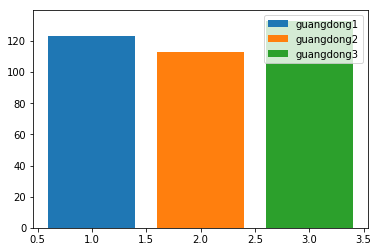

In [3]:
# 绘图
# coding:utf-8
import matplotlib
import matplotlib.pyplot as plt #数据可视化
plt.bar([1], [123], label=u"guangdong1")
plt.bar([2], [113], label=u"guangdong2")
plt.bar([3], [133], label=u"guangdong3")
plt.legend() #表示绘制图片
plt.show() #展示图片

e:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "e:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "e:\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "e:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "e:\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "e:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "e:\anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(

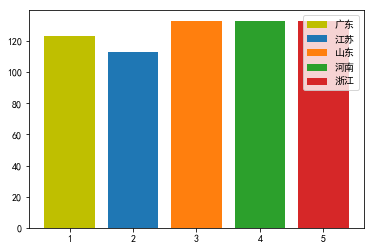

<Figure size 432x288 with 0 Axes>

In [11]:
# 绘图，处理中文的情况
# coding:utf-8
import matplotlib
import matplotlib.pyplot as plt #数据可视化
matplotlib.rcParams["font.sans-serif"] = ["simhei"] #配置字体
matplotlib.rcParams["font.family"] = "sans-serif"
plt.bar([1], [123], label=u"广东", color="y")
plt.bar([2], [113], label=u"江苏")
plt.bar([3], [133], label=u"山东")
plt.bar([4], [133], label=u"河南")
plt.bar([5], [133], label=u"浙江")
matplotlib.use("Agg")
plt.legend() #表示绘制图片
plt.show() #展示图片
plt.savefig("1.jpg") #保存图片

In [3]:
# coding:词云分词
# jieba的使用
import jieba

mystr = "雾茫茫，看不见，裹思念，情无限；雾绵绵，舞翩跹，心飞旋，意不断；雾淡淡，如云散，祝福伴，心灿烂。雾来福运来，雾去更精彩"
sentence = jieba.cut(mystr, cut_all=True)
print(sentence)
print("----------------------------------------------")
print("/".join(sentence))
sentence2 = jieba.cut_for_search(mystr)
print("/".join(mystr))

<generator object Tokenizer.cut at 0x000001E77B0A2E08>
----------------------------------------------
雾茫茫/茫茫///看不见/不见///裹/思念///情/无限///雾/绵绵///舞/翩跹///心/飞旋///意/不断///雾/淡淡///如云/云散///祝福/伴///心/灿烂///雾/来/福/运/来///雾/去/更/精彩
雾/茫/茫/，/看/不/见/，/裹/思/念/，/情/无/限/；/雾/绵/绵/，/舞/翩/跹/，/心/飞/旋/，/意/不/断/；/雾/淡/淡/，/如/云/散/，/祝/福/伴/，/心/灿/烂/。/雾/来/福/运/来/，/雾/去/更/精/彩


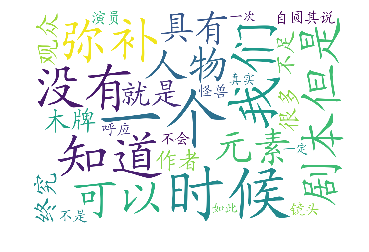

In [7]:
# coding:utf-8
import jieba #分词
import matplotlib.pyplot as plt #数据可视化
import wordcloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS #词云
import numpy as np #科学计算
from PIL import Image #处理图片

# 打开文本
textfile = open("langyabang.txt").read()
wordlist1 = jieba.cut(textfile, cut_all=True)
wordlist2 = jieba.cut_for_search(textfile)
space_list = " ".join(wordlist1) #链接词语
backgroud = np.array(Image.open("adc.jpg")) #背景图片
mywordcloud = WordCloud(background_color="white", #背景颜色
                        mask=backgroud, #写字用的背景图
                        max_words=30, #最大词语数量
                        stopwords=STOPWORDS, #停止的默认词语
                        font_path="simkai.ttf", #字体
                        max_font_size=200, #最大字体尺寸
                        random_state=50, #随机的角度
                        scale=1).generate(space_list) #生成词云
image_color = ImageColorGenerator(backgroud) #生成词云的颜色
plt.imshow(mywordcloud) #显示词云
plt.axis("off") #关闭保存
plt.show()


In [1]:
#!/usr/bin/env python
# 这是github上原版的
"""
Using custom colors
===================

Using the recolor method and custom coloring functions.
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'a_new_hope.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [1]:
#!/usr/bin/env python
# 这是汉化版的
"""
Using custom colors
===================

Using the recolor method and custom coloring functions.
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'langyabang.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1, font_path="simkai.ttf").generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("langyabang.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

岗位职责：
信息化系统系统集成
项目经理      1名
任职要求：
1、3年以上 Asp.Net 项目开发经验， B/S架构项目经验；
2、熟练使用 ASP.NET MVC、JavaScript/Jquery/Ajax 等开发技术；
3、熟练编写SQL Server MySQL Oracle环境中的视图、存储过程、函数等，熟悉基本的数据表优化方法；
4、熟悉WCF、EF、IOC等技术、熟悉常用的设计模式；
5、具有.Net Core或Java项目开发经验；具有DDD开发经验；具有接口实现、组件封装能力、接口抽象设计能力、良好的文档编写能力者优先。
6、有使用
、
、Ext等第三方前端框架经验者优先。
7、有
过大型系统开发经验者或有公路工程项目开发经验者优先。
8、良好的编程风格，工作积极主动，有独立工作能力，有创造性，责任心强，刻苦耐劳，能承受较大的工作压力；
1、
参与项目需求分析，将用户需求转化为
2、
或主导完成项目方案的制定，
3、
负责项目元器件选型、硬件电路的设计、PCB绘制、测试板的焊接、调试优化等工作
4、
完成各种文档和标准化资料的编写工作
5、参与产品设计、测试及量产过程中的技术性问题的解决
。
6、
协助相关部门解决产品出现的各种问题。
任职要求：
1、电子、通信、自动化、计算机等相关专业，本科以上学历，特别优秀者可以放宽到大专学历。 
2、具有3年以上产品开发经验，特别优秀者可以适当放宽。 
3、精通C语言编程，熟悉C++编程优先；熟悉DSP和ARM处理器平台编程。 
4、熟悉常用PCB设计软件，可以熟练使用Altium Designer 画图软件进行原理图和PCB设计。 
5、熟练掌握Modbus 等常用通讯协议。  
6、独立开发过产品或担任过项目负责人，有成熟产品在市场上运行者优先。 
7、熟悉各种通讯协议编程者优先。 
8、有高速电路板layout经验者优先；有EMC经验者优先。 
9、有各种操作系统驱动和应用开发经验者优先。
10、有摄像头开发、视频/图像处理、网络语音通讯相关经验者优先。
11、有物联设备，防爆设备开发经验者优先。
12、有较强的抗压能力；有团队意识；有一定的沟通能力，文档书写能力。  
工作职责：
参与系统开发；独立承担功能模块的开发及架构设计。
任职要求： 
1、能够结合系统的整体功能需求，设计并规划功能模

任职资格：
1.至少精通一种数据分析技能（IBM SPSS/Python);
2.有较强的逻辑思维能力和分析能力；
3.从事两年以上数据分析相关岗位；
4.本科以上学历，专业不限，性别不限。
1、享受法定休假，公司实行7小时工作制，周末双休； 
平台的开发和维护工作。
的业务需求，持续优化系统，降低运行风险，
并提高系统稳定性。
化策略的执行和监控。
爬虫及信息分类工作，负责小程序开发
。
任职要求：
年开发工作经验。
MongoDb
等关系型数据库或者Mongodb、Redis数据库
。
3. 有小程序开发经验优先
。
先。
任职要求：
Python
2、有一定的计算机基础
c
岗位职责：
1、
1、
负责
产品的后端开发工作，主要开发语言为 
Python
Python
2、
2、
与产品设计师、前端工程师一起探讨、设计、实现
产品的新功能及改进
与基础架构工程师、运
维工程师一起实现稳定、可扩展的后台服务
数据驱动，不断通过产品和技术数据进行改进，并完成快速迭代
1. 参与PaaS平台后台的系统架构设计工作
2. 参与项目和产品的设计过程
3. 通过编码实现软件设计目标
4. 支持测试工作，修正软件过程中的bug
5. 完成软件相关文档的编写工作
任职要求：
1、具有3年以上后端开发经验
2、熟练掌握至少一门编程语言，如Python、golang、Java、c++等；
3、熟悉基于Linux平台上编程；
4、了解Docker、Kubernetes等容器相关技术
5、优秀的分析与解决问题能力；
6、熟悉通用设计模式，能独立进行软件开发；
7、有较强的学习和沟通能力，以及团队合作精神；
8、诚实、踏实、积极主动、抗压能力强，喜欢挑战困难
岗位描述：
1、参与开发和维护后端 Python 服务框架；
2、参与开发和维护数据统计、分析系统。
3，协助工程解决开发问题。
岗位要求：
1、良好的团队合作精神和沟通能力，有参与产品、技术交流的意识；
2、了解Python 使用，了解Linux； 
3、良好的编程习惯，良好的学习主动性和习惯。
4、应届生优选
任职要求：
1、全日制大专及以上学历，计算机（网络)、电子信息、软件工程、（电气）自动化、测控、机电、数学、物理相关等专业。
2、有一定的计算机语言基础，如：Java、C语言、C++、C#、.Net等。
 
岗位职责：


【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正式《劳动合同》，入职第一年平均月薪高于
9000
元。
2
、在京工作一年后要求回当地工作的，可申请调回当地省会城市的分公司或合作企业工作。
【职业背景】
1
、
Java+
大数据
——Java 
已经连续
21
年位居热门编程语言之首。在薪酬待遇方面，远高于其他程序员。
2
、人工智能
+ Python——
目前国内大学还没有开设人工智能专业，这既是挑战，又是机遇。一名入门级的
AI
工程师月薪轻松就可以拿到
15K
，中、高级工程师，企业更是给出
30
万到
150
万的年薪；
Python
非常适合
AI
开发，它更接近自然语言，编程简单
, 
速度超快，它能够把各种模块很轻松地联结在一起
,
开发人员不必重复造轮子，像搭积木一样就可以完成绝大部分工作，
 
非常适合初学编程者。　　　
未来５０年都将是人工智能的天下，人工智能时代才刚刚拉开帷幕，现在加入，四年后，当第一期
AI
大学生进入这一领域时，你已经年薪百万，已经是他们的总监、
CEO
了。
 
【温馨提示】：
每日简历投递量非常大，欢迎主动与电话（微信）
18910382858
预约，谢谢！
北京中关村软件园欢迎您！
【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正式《劳动合同》，入职第一年平均月薪高于
9000
元。
2
、在京工作一年后要求回当地工作的，可申请调回当地省会城市的分公司或合作企业工作。
【职业背景】
1
、
Java+
大数据
——Java 
已经连续
21
年位居热门编程语言之首。在薪酬待遇方

【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正式《劳动合同》，入职第一年平均月薪高于
9000
元。
2
、在京工作一年后要求回当地工作的，可申请调回当地省会城市的分公司或合作企业工作。
【职业背景】
1
、
Java+
大数据
——Java 
已经连续
21
年位居热门编程语言之首。在薪酬待遇方面，远高于其他程序员。
2
、人工智能
+ Python——
目前国内大学还没有开设人工智能专业，这既是挑战，又是机遇。一名入门级的
AI
工程师月薪轻松就可以拿到
15K
，中、高级工程师，企业更是给出
30
万到
150
万的年薪；
Python
非常适合
AI
开发，它更接近自然语言，编程简单
, 
速度超快，它能够把各种模块很轻松地联结在一起
,
开发人员不必重复造轮子，像搭积木一样就可以完成绝大部分工作，
 
非常适合初学编程者。　　　
未来５０年都将是人工智能的天下，人工智能时代才刚刚拉开帷幕，现在加入，四年后，当第一期
AI
大学生进入这一领域时，你已经年薪百万，已经是他们的总监、
CEO
了。
 
【温馨提示】：
每日简历投递量非常大，欢迎主动与电话（微信）
18910382858
预约，谢谢！
北京中关村软件园欢迎您！
【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正式《劳动合同》，入职第一年平均月薪高于
9000
元。
2
、在京工作一年后要求回当地工作的，可申请调回当地省会城市的分公司或合作企业工作。
【职业背景】
1
、
Java+
大数据
——Java 
已经连续
21
年位居热门编程语言之首。在薪酬待遇方

任职要求：
福利待遇：
福利待遇：
1、朝九晚六  周末双休；
2、享有国家规定的带薪年假、法定节假日等福利；
3、转正后正常缴纳五险一金；
4、公司每月一次员工专属生日趴；
5、办公环境优越，公司地处位于地铁站附近，交通便利；
6、公司可提供住宿。
【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正式《劳动合同》，入职第一年平均月薪高于
9000
元。
2
、在京工作一年后要求回当地工作的，可申请调回当地省会城市的分公司或合作企业工作。
【职业背景】
1
、
Java+
大数据
——Java 
已经连续
21
年位居热门编程语言之首。在薪酬待遇方面，远高于其他程序员。
2
、人工智能
+ Python——
目前国内大学还没有开设人工智能专业，这既是挑战，又是机遇。一名入门级的
AI
工程师月薪轻松就可以拿到
15K
，中、高级工程师，企业更是给出
30
万到
150
万的年薪；
Python
非常适合
AI
开发，它更接近自然语言，编程简单
, 
速度超快，它能够把各种模块很轻松地联结在一起
,
开发人员不必重复造轮子，像搭积木一样就可以完成绝大部分工作，
 
非常适合初学编程者。　　　
未来５０年都将是人工智能的天下，人工智能时代才刚刚拉开帷幕，现在加入，四年后，当第一期
AI
大学生进入这一领域时，你已经年薪百万，已经是他们的总监、
CEO
了。
 
【温馨提示】：
每日简历投递量非常大，欢迎主动与电话（微信）
18910382858
预约，谢谢！
北京中关村软件园欢迎您！
【岗位方向】：
1
、
 Java+
大数据软件开发工程师实习生
2
、
 
人工智能
+Python
开发工程师实习
生
【任职要求】：
1
、大专及以上学历，计算机（网络
)
、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2
、有计算机语言基础者优先，如：
C
语言、
Java
、
.Net
、
PHP
等；
【福利待遇】：
1
、签订正

1、参与金融云分布式系统的开发，根据业务需求，完成从设计到开发的工作；
2、云平台OpenAPI 以及SDK的设计和定制开发。
3、参与负责各种SDN系统，云数据库系统以及其他类型云产品的管控架构设计和开发，如RDS，Redis，云存储等等。
任职资格：
1、本科以上学历，5年经验；
2、基本功扎实，熟练掌握常见的数据结构和算法；
3、熟悉Django/Tornado等常用的web框架，有较强的编码能力，熟练掌握Python语言，或者其他OO语言；；
4、有分布式系统开发经验者优先；
岗位职责:
1、负责业务、财务部门对数据应用需求的技术实现，完成从数据源到应用底层的ETL流程。
2、参与风控、推荐、图像/语音识别、爬虫等系统设计、开发，维护现有的平台代码。
3、承接业务模型到数据模型、算法模型的落地，促进金融风控、用户推荐等策略优化。
任职要求:
1、全日制本科及以上学历，精通python，有2年以上开发经验。掌握MongoDB、MySQL、Redis、消息队列等常用组件。
2、具备独立设计数据库，并且开发小工具的能力。
3、熟悉Linux环境下的开发环境，熟悉Nginx配置、调优，熟悉Shell脚本。
4、熟悉Django/Flask等至少一种框架。
5、良好的需求沟通、逻辑分析、协调、执行、抗压能力。
6、有推荐、爬虫经验者优先。
工作职责：
 
1.
负责公司相关业务、产品和服务的开发和维护。
2.
负责产品后端架构的设计、实现、改进和优化。
3.
参与前沿技术的探索。
 
职位要求
:
1.
计算机基础知识扎实，对数据结构及算法有较好的掌握。
 
2.3
年以上经验。
3.具有Python、Java 
语言开发经验。
4.
熟悉
 MySQL 
数据库以及
Redis 
或
 Memcached
、
MongoDB 
等
 NoSQL 
技术。
5.
有优秀的解决问题的能力，有很强的学习能力。
6.
具有大数据分析处理、
AI 
产品落地经验者优先。
7.
自动化、数据分析软件开发经验者优先。
8.此岗位需要同时具备Java和Python开发经验，请慎投。
9.请勿重复投递。
•You will drive strategic technical leadership
•Perform continuous analysis and requirement

3.协助研究与开发NLP（自然语言处理）相关产品和应用。
1.计算机或相关专业本科以上学历，坚实的计算机基础与较广泛的数学知识；
2.基本掌握Tensorflow的使用；
3.对人工智能（机器学习和深度学习）有充分的好奇心和探索欲；
4.熟练使用Python
岗位职责：
1、负责青少年Python课程的研发、设计、PPT课程制作；
2、带领教研老师负责课程体系的搭建、负责课程研究方向的决策；
3、做好Python课程的整体思路设计工作；
4、课程更新迭代的研发工作；
任职条件：
1、本科以上学历，计算机相关专业毕业；
2、有过3年左右从事Python课程的研发设计工作经验，熟悉Python软件的使用及原理；
3、有过2年左右从事教育行业软件类教学经验，熟悉青少年编程课程
4、热爱编程教育工作，熟悉少儿编程行业发展趋势。
1、产品的系统设计，框架搭建，代码编写
2、研发团队的任务进度管理、代码质量保证 
3、配合产品完成系统或产品的实现以及实际部署应用
4、其他相关新技术、新产品的研究和验证
任职资格：
1、  IT行业北京，有较强的软件开发能力和经验，能熟练使用Python语言进行数据分析，图像处理以及客户端程序或Web系统的开发。
2、  有较强的数学分析计算能力，有金融、证券等行业经验更好
3、  较好的沟通能力、阐述表达能力、资料梳理能力以及文档书写能力 
4、思维逻辑清晰，理念开放，勇于接受挑战，乐于接受新方法、新技术
岗位职责：
通过线上小班的方式，结合游戏化的动漫视频，对青少年进行趣味教学，课程主要环节：
、教授
8~12
岁青少年学习代码编程； 
、完成指定教学任务； 
、主持引导：引导孩子们做展示演讲、自由发言（老师担任主持人、评委、引导员角色）； 
、答疑互动：及时解答学生们遇到的问题； 
、拓展学习：指导学生们开发制作有趣的软硬件创新项目。 
 
任职要求：
、本科数学、物理学、计算机等理工类专业； 大三、大四学生或研究生在读，可接受优秀应届毕业生；
、熟悉
C
语言或者
java
、
python
，有数学功底和逻辑思维能力； 
、愿意投身于教育事业，富有创造力与创新意识，有教育行业从业经验者优先录用； 
、有机器人、乐高、创客教育等教学经验者优先录用。 
、每周可提供三天以上时间。
 
待遇：
、课时津贴：
100
元
/
节课，
1h/
节

：
长沙开福区芙蓉中路一段平安大厦7楼
2.计算机相关专业，热爱编程。
福利待遇：
1、工作时间：5天8小时，无需加班，周末双休；
2、社保：医疗、生育、工伤、失业、养老保险及住房公积金；
3、奖金：每月绩效奖金、项目奖金、年终奖金；一切靠实力吃饭；
4、娱乐福利：每周末各类娱乐活动自由组合，专属生日趴；
5、假期福利：享受国家规定的带薪年假、法定节假日
当下最火的编程语言，你还在等什么？没有经验起薪8K到12K，有过经验的起薪12K到14K。您的加入将是公司极大的荣幸！我们就在南开等着您。
岗位职责：
1)负责组织上课的整体流程，讲授课程；
2)负责与学员进行沟通、交流，全面了解学员的需求，解答学员的疑惑；
3)承担课程的辅导、答疑、批改作业、组织课程讨论等教学环节工作；
4)组织学生测评，并及时评定学生成绩，做好成绩分析工作；
5)配合并完成班主任和其他人员的相关工作。
 
任职资格：
1)参与过乐高机器人教学，参加过fll、wro比赛优先
；
2）本科及以上学历，
计算机、网络工程等相关专业，应届毕业生亦可
；
3)了解Java语言、JavaScript语言、PHP语言、C++
其中
一门
语言
；
4)普通话标准，表达清晰有条理
；
5)有耐心、爱心，喜欢小孩子。
 
工作地点：万达、万象天成、裕彤、乐汇四大校区就近分配
微信公众号：童程童美
 
【
，童程童美教研实力和集团运营水准一直是行业内的标杆，无论过去现在和未来
,我们一直在用心做教育！
岗位职责：
1、录入网站站点；
2、编写Python初级代码；
3、其他领导交给的任务；
4、负责物联网应用系统开发、算法实现。
任职资格：
1.计算机、IT软件及互联网等相关专业可优先；
2.实习生岗位，有无项目经验都可以，欢迎优秀应届毕业生前来应聘。
3.对互联网开发有一定了解的可以适当放宽学历、专业要求；
4.思路清晰，具备良好的沟通能力和理解能力，诚实、上进、踏实、好学，具有良好的团队合作精神；
5.具有很强的学习能力和对新技术的追求精神，能够承担相应的项目开发工作，具有比较强的责任心。
公司福利：
1.完善的培养体系和晋升机制，循序渐进参与公司项目开发；
2.公司提供提供吃住，就在公司附近，十分钟内即可到达公司上班；
3.工作时间：每天7.5小时，周末双休，节假日按国家规定执行；
4.转正后提供五险一金，

任职要求
任职要求
1、18-
30
岁，工作经验
岁，工作经验
不限
不限
2、
大
大
专以上学历，
专以上学历，
理工科
理工科
专业毕业优先
专业毕业优先
3、学习能力强，有良好的主动性和责任感
岗位职责
岗位职责
1、了解一定python基础；
2、根据项目需求进行数据分析与技术支持；
3、
协助团队撰写设计开发及实现文档、流程；
协助团队撰写设计开发及实现文档、流程；
4、
能够快速融入团队，积极、有效地开展工作。
能够快速融入团队，积极、有效地开展工作。
公司福利：
公司福利：
1、
假期安排：享有国家劳动法规定的各种节假日，公司另增多种带薪休假，丰富多类的节假日礼品福利！
假期安排：享有国家劳动法规定的各种节假日，公司另增多种带薪休假，丰富多类的节假日礼品福利！
2、
工作时间：朝九晚六（午休
3、
晋升平台：为优秀人才提供展现才能的大平台和晋升机会！
晋升平台：为优秀人才提供展现才能的大平台和晋升机会！
4、
薪酬福利：根据各岗位各人才的技能要求，提供富有竞争力的薪酬待遇！
薪酬福利：根据各岗位各人才的技能要求，提供富有竞争力的薪酬待遇！
5、
年终奖金：丰厚的年终奖金等您来拿！
年终奖金：丰厚的年终奖金等您来拿！
6、
社会福利：缴纳五险及住房公积金！
社会福利：缴纳五险及住房公积金！
7、
员工福利：不定期举办员工文娱活动，员工生日、餐聚、聚会等各种腐败活动，丰富多彩的各类体育俱乐部、带薪年休假，年度体检、年度旅游。。。。好多活动福利等你来！
员工福利：不定期举办员工文娱活动，员工生日、餐聚、聚会等各种腐败活动，丰富多彩的各类体育俱乐部、带薪年休假，年度体检、年度旅游。。。。好多活动福利等你来！
8、
办公环境：坐标
办公环境：坐标
繁华市中心
繁华市中心
，甲级办公楼，创新个性化的办公室风格，交通非常便利！
，甲级办公楼，创新个性化的办公室风格，交通非常便利！
这是一支欢乐热情开放的年轻团队，开放和创新的企业文化，等你一起来玩转职场！
这是一支欢乐热情开放的年轻团队，开放和创新的企业文化，等你一起来玩转职场！
任职资格：
任职资格：
、有扎实的编程功底
,
丰富的
Python
的实际工作经验
,
熟悉常用的开源库
Django
、
Flask
、
Numpy
、
Pandas
、
Scipy
等；
、熟悉
linux,
有良好的数据结构和算

1、享受法定休假，公司实行7小时工作制，周末双休； 
任职要求：
1、18-30周岁，大专以上学历，计算机相关专业，应届生优先；
2、有良好的沟通能力、处理解决问题的能力、抗压能力和强烈的责任感；
3、高度的责任心、良好的沟通技巧和团队合作精神。
【福利待遇】
1、外地员工可提供住宿；
2、工作时间：早9-晚6，双休， 法定假日休息，带薪年假；
3、签订正式劳动合同，转正即缴纳五险一金；
4、日常补贴（话费、工作餐、交通费补贴）；
5、正式员工享受十三薪及年终奖；
6、每年享受国家规定的带薪年假、法定节假日等福利。
注意：近期不能面试者，请不要投递简历。谢谢合作！
任职资格：
任职资格：
、有扎实的编程功底
,
丰富的
Python
的实际工作经验
,
熟悉常用的开源库
Django
、
Flask
、
Numpy
、
Pandas
、
Scipy
等；
、熟悉
linux,
有良好的数据结构和算法基础；
、熟悉数据库并有优化经验
,
熟练掌握
SQL,
熟悉
MPP
、
Oracle
、
MySQL
、
Redis
、
Memcache
中一种或多种；
、具备良好的识别和设计通用框架及模块的能力；
、具备
TensorFlow
框架开发经验；
、能够承担工作压力
,
具备创新思维、具备团队协作精神；
、有数据挖掘建模经验尤佳。
岗位职责：
岗位职责：
、负责产品研发；
、负责高质量的设计和编码；
、承担重点、难点的技术攻坚；
、参与产品讨论和开发实现。
3、能吃苦耐劳。
薪资待遇：
1、入职即可上国家规定的五险一金；
2、逢节必过；
3、不定期举办部门聚会（一月至少一次）；
4、举办生日party！发好利来蛋糕卡一张；
上班时间：
上九下六  中午休息一个小时 国家法定节假日休
机会是留个有挑战的人的，所以不要犹豫，我们期待您的加入！！！
福利待遇：
1、公司能提供住宿，宿舍环境干净、整洁，有餐补；
2、公司为员工购买五险一金，签订正式劳动合同；
3、享受带薪年假、婚假、病假、丧假等福利；
4、公司提供广阔的技术平台，给每一位员工提供最大的学习与发展空间；
上班时间：早九晚六，周末双休，按照国家法定节假日放假。
有意向者可以直接投递一份简历，我将会在第一时间跟您联系！
职位描述：
1.负责若干来源的新闻文本爬取
2.负责若干来源的图表数据爬取
3.尽可能的应对反爬

【岗位职责】:
【岗位职责】:
、负责智能搜索；
负责协助项目后续维护和产品升级；
【职位要求】：
1、大专及以上学历，
2、
具有独立思考、灵活解决问题的能力，
4、具有良好的沟通能力、理解能力及团队精神；
1、享受法定休假，公司实行7小时工作制，周末双休； 
工作职责：
1、执行项目需求收集并记录归档；
2、执行信息系统开发计划和维护计划；
3、参与执行软件项目管理任务；
4、配合项目测试计划任务，执行项目维护任务；
5、制定公司软件开发专业标准，并严格执行；
6、 编写开发、维护的项目文档；
7、完成上级安排的其他工作任务。
任职资格：
1、 本科及以上学历，熟练使用python语言，熟悉常用软件设计模式、 熟悉网络编程、多线程等开发技术；
2、熟悉MSSQL或MySQL,具有熟练编写SQL语句的能力；
3、有DELPHI或.NET开发经验或熟悉AWS Lambda开发者优先；
4、具有良好的沟通理解能力、团队配合意识、责任心强,较强的学习能；
5、有Delphi或.NET开发经验优先。
※本职位为日本工作职位，简历请写明日语等级，不会日语的请勿投递，感谢配合！！！
 
工作地点：东京及周边
 
岗位要求：
 
薪资待遇：
免费宿舍，交通补助，定期加薪，免费培训，定期团建，员工旅游，节日福利等
Python数据分析
工作职责：
1、针对需获取数据进行数据采集与清洗、数据仓库建设、建模、跟踪与调度等等；
2、深入理解业务需求，与业务一起构建数据体系、日常报表并推动数据产品化；
3、完善日常数据监控体系，监控和洞察业务问题； 
任职资格:
1、数学、 统计学、计算机等相关专业；本科及以上学历；3年以上数据分析相关工作经验；电商服饰行业工作背景优先。
2、掌握回归分析、分类、聚类、关联规则等常用数据统计模型和挖掘技术，并有独立完整的建模实践经验。
3、精通Python编程，熟悉Pandas/Numpy/Scipy等数据分析库；熟悉scrapy, requests，xpath, BeautifulSoup等数据爬取工具。
4、有过使用Python进行数据分析/处理，良好的代码习惯，要求结构清晰、命名规范、逻辑性强。
5、熟练使用Unix/Linux操作系统和mysql等数据库系统，有数据库设计经验者优先。
6、良好的需求沟通、逻辑分析、协调、执行、抗压能力。
1、计算

1. 全日制本科 / 计算机相关专业
2. 3年以上Python开发经验
3. 熟悉至少一种关系型数据库
4. 精通Django / Flask / Tornado 之一, 能快速实现原型
5. 英文文档阅读能力
任职要求：
1、大专或以上学历，相关理工科专业。
3、有较强的沟通能力、严谨的逻辑思维以及数据敏感性。
4、具备良好的时间管理、规划执行力。
工作地址：
  苏州市吴中区吴中东路158号利通大厦13楼1A06
TCP/IP
Socket
(10) 
任职要求：
1.18岁-28岁，对IT行业有着浓厚的兴趣
2.应届毕业生亦可，做事踏实、悟性高、学习能力强、积极向上。
3.会基本的计算机操作，良好的逻辑思维。
4.良好的沟通能力，较强的服务意识。
福利待遇： 
1、享受法定节假日，朝九晚六，周末双休； 
2、五险一金、团队活动、生日会、下午茶及丰厚福利待遇； 
3、高速成长的个人发展机会，积极进取的企业文化，与公司共同成长的挑战； 
4、公司工作环境优雅、氛围好，同事关系融洽，定期举行生日派对、聚餐等丰富活动。
5、公司免费提供公寓式住宿，新装修，全套家具，距上班地点近，上下班方便
职位描述：
1. 负责游戏测试工具开发及游戏前沿技术研究。
2. 挖掘能提升游戏质量的工具需求，并能独立完成工具架构和模块设计、编码、测试、文档编写、使用推广等工作。
3. 对 web 开发、移动操作系统、游戏开发的前沿技术进行研究和普及。
职位要求：
1. 本科或以上计算机相关学历，英语 CET6 及以上；
2. 熟练掌握Python编程，熟悉 C++、Go更佳；
3. 熟悉主流的 web 前后端框架，例如 angular 、vue、 django、flask等，有web前后端开发经验者优先；
4. 能够熟练在Linux环境下进行开发和调试
5. 熟悉 MySQL 、Redis、 MongoDB等数据库；
6. 富有探索精神，热衷于开源项目开发及社区讨论，参与过大型开源项目者更佳；
7. 具备良好学习、沟通能力及团队协作精神，对工作积极严谨，勇于承担压力，敢于挑战自我，乐于尝试最新技术。
3.前期以助理的方式参与并成长，直到能上手做Python开发项目
岗位职责：
1
、负责公司产品的设计、研发工作；
2
、负责相关技术文档的编写和审核；
3
、负责系统排查、调试、性能调优等开

任职要求
1、18-
30
岁，工作经验
不限
2、
大
专以上学历，
理工科
专业毕业优先
3、学习能力强，有良好的主动性和责任感
岗位职责
1、了解一定python基础；
2、根据项目需求进行数据分析与技术支持；
3、
协助团队撰写设计开发及实现文档、流程；
4、
能够快速融入团队，积极、有效地开展工作。
公司福利
1、
假期安排：享有国家劳动法规定的各种节假日，公司另增多种带薪休假，丰富多类的节假日礼品福利！
2、
3、
晋升平台：为优秀人才提供展现才能的大平台和晋升机会！
4、
薪酬福利：根据各岗位各人才的技能要求，提供富有竞争力的薪酬待遇！
5、
年终奖金：丰厚的年终奖金等您来拿！
6、
社会福利：缴纳五险及住房公积金！
7、
员工福利：不定期举办员工文娱活动，员工生日、餐聚、聚会等各种腐败活动，丰富多彩的各类体育俱乐部、带薪年休假，年度体检、年度旅游。。。。好多活动福利等你来！
8、
办公环境：坐标
繁华市中心
，甲级办公楼，创新个性化的办公室风格，交通非常便利！
这是一支欢乐热情开放的年轻团队，开放和创新的企业文化，等你一起来玩转职场！
※本职位为日本工作职位，简历请写明日语等级，不会日语的勿投，感谢配合！！！
 
岗位要求：
 
工作地点
：
东京
 
薪资待遇：
免费宿舍，交通补助，定期加薪，免费培训，定期团建，员工旅游，节日福利
岗位职责：
1.辅助设计师设计和开发分布式网络爬虫程序.
2.协助工程师对数据库的建设和维护。
任职要求：
1.基本要求：统招大专及以上学历，经济管理，工商管理 自动化  电子商务 机械类 。计算机相关专业。
2.无需工作经验，可实习接受应届毕业生。
3.良好的沟通，组织协调能力 
4.对行业技术敏感 善于思考 乐于发现。
※本职位为日本工作职位，简历请写明日语等级，不会日语的请勿投递，感谢配合！！！
 
工作地点：东京及周边
 
岗位要求：
 
薪资待遇：
免费宿舍，交通补助，定期加薪，免费培训，定期团建，员工旅游，节日福利等
※本职位为日本工作职位，简历请写明日语等级，不会日语的请勿投递，感谢配合！！！
 
工作地点：东京及周边
 
岗位要求：
 
薪资待遇：
免费宿舍，交通补助，定期加薪，免费培训，定期团建，员工旅游，节日福利等
工作职责
1.搭建量化策略开发平台；
2.维护量化模型交易基础设施，如数据库、策略库等

开发工程师
岗位要求：
、具有
年及以上
后端开发经验并负责过一个独立项目设计，有大型互联网项目开发经验者优先；
、具有良好的程序设计思想，理解面向对象程序设计，能合理运用设计模式；
、对
架构和编程具有较为深入的理解；
、熟练使用
之中至少
种开发语言；
、对
有深入了解，并具有设计、开发和优化的实际经验。如对
有深入了解者尤佳；
、熟悉
环境，掌握
使用。
、熟悉
应用开发流程
、熟练掌握
、
协议及网络编程，熟悉多线程技术；
、熟悉
、
、
、
、
、
等常用的开源框架；
加分项：
、具备使用
的开发实践经验
、熟悉和有
、
开源项目二次定制开发
、责任心强，具有良好的沟通、协作能力和团队合作意识；
岗位职责：
1、参与公司产品的整体规划、功能设计、开发工作；
2、负责公司产品功能模块的升级迭代和维护；
任职要求：
1、本科及以上学历，至少2年以上python开发经验；
2、有良好的代码编写能力和良好的代码编程习惯，熟悉git；
3、熟悉Linux和Http协议；
4、熟悉python web框架flask或django, 有后台服务开发经验；
5、熟悉SQL和数据库设计，熟悉python与数据库交互；
6、熟悉redis, rabbitmq优先；
7、工作负责，积极进取，能承受工作压力；
8.  有良好的团队合作能力，善于沟通，热爱学习。
我们的团队成员都是
80
后、
90
后，我们是充满激情和干劲的团队，我们是有梦想有追求的团队
……
如果你有满腔热忱，如果你不想碌碌无为，如果你想通过自己的努力成为合伙人
……
来吧！朋友，加入我们，我们会给你释放梦想的平台，我们会让你的美梦成真
……
期待有为的你加入！！！
为了让我们的小伙伴能够快乐、健康的在一起为了梦想而努力，我们提供了以下多种福利及文化活动：
1
、每天工作
8
小时，弹性工作时间；
2
、公司年度健康体检，小伙伴在为公司默默奉献的同时，公司也时刻关注着他们的健康。
3
、量身定制的培训计划，让员工在我们细致入微的帮助下更快的融入团队。
4
、丰富的企业文化活动：
  
每天：美味的零食和饮品；
  
每两周：组织大家去打乒乓球、羽毛球，小伙伴的健康是我们一直关注的；
  
每月：家人生日会（给每位寿星唱着生日快乐歌，分享美味可口的蛋糕，尽享温馨时刻）；
  
季度：团队建设、拓展活动；
  
年

岗位职责:
熟悉Notebook源码。 
抽取Notebook服务相关接口。 
按需要改造Notebook源码
任职要求:
1、计算机相关专业本科及以上学历，3年以上python后台开发经验； 
2、熟悉tronado，Django等框架，掌握redis，mongodb等数据库； 
3、熟悉SQL，熟悉Mysql、SQLite等
一、岗位要求：
1、品行端正、有责任心与进取心，良好的沟通能力与团队协作能力；
2、思维活跃、有创新能力与创新意识者优先；
3、爱好新事物，新技术，新领域，对于新科技领域感兴趣；
4、能够同事处理不同线性的任务和工作内容；
5、大专及以上学历，接受应届生，年龄在18-25周岁。
二、待遇：
1、入职签订劳动合同、五险一金、三奖三补（三奖：年终奖、满勤奖、本岗位绩效奖；三补：通讯补助，通勤补助、伙食补助。）
2、公司每一年调薪1-2次，根据员工工作表现及公司发展情况。
岗位职责
岗位职责
1.
负责设计和开发分布式网络爬虫系统，进行多平台信息的抓取和分析；
负责设计和开发分布式网络爬虫系统，进行多平台信息的抓取和分析；
 
2.
负责网页信息抽取、数据清洗等研发和优化工作；
负责网页信息抽取、数据清洗等研发和优化工作；
 
3.
负责抓取数据的深度提取和挖掘。
负责抓取数据的深度提取和挖掘。
 
 
任职资格
任职资格
 
1. 
熟悉
熟悉
linux
平台开发
平台开发
;
2. 
精通
精通
Python
，精通
，精通
scrapy
；
；
 
3. 
精通网页抓取原理及技术，精通正则表达式，从结构化的和非结构化的数据中获取信息；
精通网页抓取原理及技术，精通正则表达式，从结构化的和非结构化的数据中获取信息；
 
4. 
熟悉常见的反爬手段并解决
熟悉常见的反爬手段并解决
(
如
如
:
验证码，
验证码，
IP
池调度，
池调度，
cookie
池调度，
池调度，
js
加密等
加密等
);
5. 
熟悉常用的
熟悉常用的
sql
与
与
nosql
数据库及缓存数据库
数据库及缓存数据库
;
6. 
熟悉
熟悉
Mysql
，有过数据库调优和海量数据存储经验优先；
，有过数据库调优和海量数据存储经验优先；
 
7. 
具有搜索相关技术研发经验者优先；
具有搜索相关技术研发经验者优先；
有一定计算机基础、
有兴趣从事AI人工智能方向

职位月薪：
6001-8000
元
/
月
工作经验：不限最低学历：中专招聘人数：
2
人
 
岗位要求：
1
、大专学历，特殊情况可以降低学历，年龄
18-30
周岁；
2
、游戏爱好者，踏实能坐得住，逻辑思维性强。
3
、想获得一份稳定的工作，对软件开发有兴趣，并且今后有从事此行业的意向；
4
、有良好的沟通、协调能力和学习能力，具备良好的团队合作精神，对工作积极严谨踏实，能承受较大的工作压力。
 
岗位职责：
1
、按照项目计划，在保质保量的前期下，按时完成任务；
2
、配合项目经理完成项目目标；
3
、具有良好的沟通协调能力，团队合作能力和敬业精神。
、对计算机有兴趣，可以接受并进入
IT
软件游戏开发制��，发展工作。
5
、对动漫游戏、网站、程序有兴趣爱好，动手能力强，学习能力快。
6
、热爱工作，为人诚信，有一定沟通、学习能力、团队合作能力。
7
、工作积极、有一定抗压能力，完成领导交代的任务。
福利待遇
1、转正后五险一金  双休法定节假日带薪休假 
2、每半年提升一次薪资  每一年晋升一次职位
3、不定时游玩学习
1
2
3
4
5
6
7
8
 
1
2
Python
2-3
Python
3
Django
4
.Net
Web
NoSql
Linux
5
1.
2.
3.
1.
1
至少
年
或
后台开发经验；
熟悉
系统基础操作；
熟悉
、
的操作；
5.
岗位职责（按责任大小填写）：
岗位职责（按责任大小填写）：
    1. 参与数据处理平台（web 服务）的开发；
    2. 参与数据挖掘相关工作。
任职要求：
任职要求：
1. 
计算机相关专业本科及以上学历；
2. 
熟练掌握python语言，熟练使用Python常用模块和第三方模块；
   3. 熟悉python WEB 开发，熟悉django，
F
lask等web框架，了解celery
   4. 熟悉常用数据库，如mysql，redis等； 熟悉linux操作
   5. 了解数据处理相关工具如numpy，pandas，sklearn等
   
· 
6. 有强烈的上进心和求知欲，善于学习和运用新知识，
· 
7. 善于沟通和逻辑表达，有强烈的团队意识和执行力
 
性别年龄：不限
性别年龄：不限
经验经历：
岗位职责
1.参与公司数据平台建设，负责后端代码编写；
2.与产品

工作内容：
参与领域行业大数据分析项目，包括金融、农业、医疗和工业大数据平台、项目和产品的研发和实施。
职位描述: 
1.负责数据分析平台后端开发、优化及维护，主要开发语言为Python
2.配合运营同事，提供技术和数据支持，完成大数据计算平台、数据建模、分析挖掘、机器学习、CRM、BI等的开发及维护 
3.与基础架构工程师、运维工程师一起实现稳定、可扩展的平台服务 
4.数据驱动，不断通过产品和技术数据进行改进，并完成快速迭代 
职位要求: 
1.对计算机相关基础知识有较好理解，了解常用数据结构和算法 
2.有扎实的编程功底，熟练掌握至少一门编程语言，如 Python、NodeJS（JavaScript）、Java、PHP、Golang等 
3.掌握关系数据库及 SQL 相关知识，了解基本的设计和优化原则，熟悉MySQL、PostgreSQL、Oracle等优先考虑
4.熟悉一种 NoSQL 数据库，熟悉Redis, MongoDB等优先考虑
5.熟悉常用Web开发相关技术，包括Web框架、协议、安全等，熟悉Flask、Tornado、Django者优先考虑
6.熟悉前端HTML5、JavaScript、CSS技术，熟悉jQuery、Bootstrap、AngularJS、ReactJS等优先考虑
7.有很强的学习能力，有主动性和上进心，不拘泥于框架，追求最佳实践 
职责:
承担设计与开发工作
充分理解项目需求,  系统架构,  参与系统设计
掌握基本的分析设计工具,  按照规范编写设计文档
完成编码实现,  测试部署,  修改完善等工作,  按项目要求完成开发工作
跟踪产品线上运行情况,  发现问题及时处理
要求:
本科以上学历
两年以上开发工作经验
精通Python常用库,  设计模式
有使用Web框架经验,  包括但不限于Django/Flask/Tornado
熟悉mysql或其他数据库系统,  具备设计能力
有Linux/Unix系统操作与管理经验
具备良好的人际沟通能力和团队协作意识
对软件开发的规范性有强烈的认知
加分条件:
掌握多种编程语言优先
具备良好的英文阅读能力优先
计算机相关专业优先
具备良好的程序设计能力优先
职位描述：
1、 根据教学计划，负责编排班课；
2、 做好讲义、试题整理；
3、 需出差；
4、 有独立开展相关学科教学的能力。


岗位职责：
1) 计算机相关专业，年龄18-28岁；
2) 熟悉常用数据结构和算法；
3) 熟悉前端开发，熟悉JQuery、Ajax、CSS等，能够使用bootstrap等实现特定前端应用界面；
4) 有志成为一名优秀的前端开发人员，我们将给予相应的技术指点，同时自己具备一定的主动精神。
具备良好的编码规范、学习能力，有独立分析解决问题能力，能够积极主动的寻找更加优秀的解决方案
岗位职责：
 
语音相关的人工智能应用开发和维护
 
岗位要求：
1、计算机及相关专业，本科及以上学历；
2、 熟练掌握Linux下C/C++设计与编程，有Linux服务端开发经验；
3、 熟悉PCM、SILK、iLBC、Opus、VP8、H.264等音视频相关技术；
4、 具有良好的表达能力、沟通能力和团队合作精神，工作责任心和抗压能力强，善于学习；
5、 有与呼叫中心集成对接的相关项目开发经验；熟悉FreeSWITCH、AsteriskOpensips等相关开源软件； 熟悉Java, Python等语言者优先；具有AI相关经验的者优先。
 
薪酬福利：
员工福利：员工宿舍（入职就可以申请）、餐饮补贴、节日慰问金、高温补贴、传统节假日礼品、带薪休假、年度旅游、员工年度效益奖等；
 
工作地点：深圳市福田区
上海市上海闵行区虹梅南路833号 国民新能源环保孵化器 1号楼8楼国民实业
岗位职责：
1、根据需要，高质量完成实训的授课任务、技术讲座任务。
2、参与部门内训，保持技术先进性，配合教研员完成相关的教学资料研发工作
任职要求：
1、具有较强的语言表达能力，普通话标准，口齿伶俐
2、计算机、数学、统计学或相关专业毕业、本科以上学历,30岁以上
3、精通计算机视觉、机器学习主要算法，并在如下一个或者多个领域有深入研究：识别、对比、检测、跟踪、机器学习、深度学习、自然语言处理、对话机器人、舆情分析
4、优秀的编程能力，熟悉Java或者Python等。
5、熟悉大规模数据处理平台Hadoop/Spark/ODPS等。
6、熟悉深度学习的框架，例如Caffe，Torch，TensorFlow等
7、具备神经网络的算法理论基础；有自主完成模型训练的经验
 2. 规划质量体系建设和质量闭环；
3. 分解项目质量目标，驱动项目组完成阶段目标； 
4. 推动测试流程建设，引导测试团队改进创新； 
5. 对

（1） 根据产品和运营需求，进行需求分析、任务分解、架构设计、代码实现；
（2）产品架构复用性、扩展性、健壮性方向优化调整；
（3）对现有系统的不足进行分析，找到目前系统的瓶颈，进行优化，提高系统性能。
（1）熟悉PHP开发语言，了解各种主流框架（如PHP的主流框架）的使用及其原理；
（2）具备优秀的数据库设计和优化能力,至少精通一种数据库应用；
（3） 熟悉Linux\Unix，能进行shell、Python编程；
（4）务实、逻辑思维缜密、工作细致有耐心；
（5）具有良好的学习能力、时间和流程意识、沟通能力、团队合作、坦诚直接，有较好的沟通交流能力,能够迅速融入团队。
   工作时间：9:00--18:00
岗位职责：
5、负责设计、开发安全解决方案 
任职要求：
 
岗位职责：
（1） 根据产品和运营需求，进行需求分析、任务分解、架构设计、代码实现；
（2）产品架构复用性、扩展性、健壮性方向优化调整；
（3）对现有系统的不足进行分析，找到目前系统的瓶颈，进行优化，提高系统性能。
任职要求：
（1）熟悉PHP开发语言，了解各种主流框架（如PHP的主流框架）的使用及其原理；
（2）具备优秀的数据库设计和优化能力,至少精通一种数据库应用；
（3） 熟悉Linux\Unix，能进行shell、Python编程；
（4）务实、逻辑思维缜密、工作细致有耐心；
（5）具有良好的学习能力、时间和流程意识、沟通能力、团队合作、坦诚直接，有较好的沟通交流能力,能够迅速融入团队。
工作时间：9:00-18:00
岗位职责：
1.
负责安全技术研究，针对关键软件和系统漏洞进行原理性分析，能够根据分析结果编写漏洞
POC
，并编写漏洞分析报告；
持续跟踪最新漏洞事件，负责应急响应；
能够独立开发漏洞检测扫描工具；
 
任职要求：
、学历本科，良好的英文阅读能力，
1
年以上反编译及漏洞分析相关经验；
、熟练掌握软件逆向静态分析
,
动态调试
,
代码跟踪等，熟练掌握
WinDbg,OllyDbg,x64Dbg,Immunity Debugger,IDA
等分析工具；
、具备一定的开发能力，熟练掌握
C
，
C++
，
Python
，
JavaScript
等；
、熟练掌握
Windows
平台漏洞原理，如堆栈溢出，双重释放，释放重引用等；
、熟悉主要的漏洞缓解机制，熟练掌握
Wind

岗位职责：
1、大数据分析和问题诊断；
2、根据分析情况并提出改进建议；
3、对基本面、技术面进行分析研究，给出行情走势分析和判断，撰写研究报告上交公司；
4、经验不足者提供助理岗位
任职要求：
1、熟练使用EXCEL、PPT、WORD等办公软件；会Python优先考虑。
2、对数据高度敏感，具备数据分析能力，逻辑思维能力强，具备高度的责任感；
3、有数据分析经验优先；
4、没有相关经验者前期带薪培训。
岗位职责：
1、负责linux服务器部署和监控的维护； 
2、负责对编写的程序进行严格的综合测试，进行故障诊断、定位、分析和调试，以及实施产品测试方案；
3、负责产品迭代上线发布、参与自动化运维平台的优化；
4、及时响应并处理线上故障，快速处理运维事故，保障业务稳定运行；
任职要求：
1、大专及以上学历，两年以上系统运维相关经验；
2、熟悉linux+nginx web服务器，熟悉tomcat性能调优；
3、会使用shell或python编写服务器脚本，维护服务器；
4、熟练MYSQL基础语句使用及mysql性能监测；
5、熟悉mongodb。
1、区域数据分析和货品问题诊断；
2、
熟练使用EXCEL、PPT、WORD等办公软件；会Python优先考虑
3、对基本面、技术面进行分析研究，给出行情走势分析和判断，撰写研究报告上交公司；
4、
对数据高度敏感，具备数据分析能力，逻辑思维能力强，具备高度的责任感；
5、要有数据分析经验1年以上，
没有相关经验者前期带薪培训。
:
1
、参与医疗器械新产品开发可行性研究及产品风险分析；
2
、负责公司产品的嵌入式软件开发；
3
、根据产品详细设计报告，完成符合功能和性能要求的软件解决方案和架构；
4
、编写及调试程序，测试程序，确保其按设计要求正常运行；
5
、编写技术文档、质量记录以及其他有关文档；
6
、领导安排的其他工作
:
1
, 
2
3
,
3
ARMCortex  (STM32) 
linux
freeRTOS,
C
, Python,Perl
MDK
4
BSP
UART
IIC
RS485
CAN
USB
Bluetooth,Wi-Fi,ZigBee
5
6 
;
7 
岗位职责：
1、参与RPA(Robotic Process Automation)软件的设计和开发
2、在软件产品实施过程中，参与功能需

任职要求：
1.Bachelor or M.S. in computer science,information technology or related field.
2.Excellent communication skills both written and verbal in English.
3.Strong work ethic, enthusiasm to learn, and a passion for machine leaning.
4.Experience developing machine learning algorithms with real-world data.
5.Experience with Python, and deep learning framework will be highly regarded but not essential..
岗位职责
 ；
岗位职责：
1. 
参与产品需求讨论，编写测试计划、测试用例
参与产品需求讨论，编写测试计划、测试用例
2.搭建测试环境，执行测试工作，并编写测试报告
3.跟踪并报告项目质量和缺陷状态
4.对公司产品进行接口（自动化测试）、功能、性能测试（自动化测试）
5.参与问题的分析及讨论，参与相关质量评估，确保设计与实现的正确性
 
 
岗位要求
岗位要求
1、本科以上学历，计算机相关专业, 2年以上软件测试经验，有大型轨道交通业务系统测试经验者优先
2、熟悉软件开发测试流程，有一定的理论基础
3、熟悉C/S,B/S测试，熟悉通讯协议和操作系统（Linux），具备一定的bug定位能力
4、熟悉mysql、SQLServer、Oracle等数据库操作，能编写联表查询脚本
5、熟练使用自动化测试工具，例如Jemter，能搭建自动化测试环境，编写自动化测试脚本（java\Javascript\shell\python）
6、具有较强的沟通能力、督促能力以及良好的团队合作精神
7、有耐心和质疑习惯，必要时能承担高强度测试工作
8、能适应一定期限的出差（2-4周）
公司福利：双休+五险一金+带薪年假+生日福利+节假日福利+健康体检等
1.本科及以上学历，计算机相关专业；
2.5年以上PON产品的软件开发经验，熟悉软件开发流程；
3.精通C/C++语言，精通数据结构，具有良好的代

岗位职责：
  
负责业务的数据收集、建模、统计与可视化，全方位支撑线上产品和线下业务迭代扩张；
  
构建数据的监测与分析平台，帮助业务人员快速、及时发现问题并找到原因；
  
进行数据应用开发，从海量数据中挖掘用户反欺诈相关信息；
  
负责大数据系统运行、维护及调优；负责大数据系统运行、维护及调优；
    5、 对产品和项目研发可能会用到的新技术进行预研。
   
    任职要求：
    
1
、3年以上Hadoop、Spark开发经验，熟练使用spark相关算法，有实时开发经验者优先；
    2
、精通MapReduce核心思想，熟悉分布式计算模型，具有良好的数据结构、算法功底; 
    3
、熟练使用java、scala、shell、python等语言中的两种即可;
    4
、掌握Flume、Kafka、Zookeeper、hbase、hive、elasticsearch等关键技术。
    5
、对数据分析新技术敏感，有一定独立分析，技术研究能力，具有良好的团队合作精神。
    6
、金融、互联网、电信3年以上数据分析、数据挖掘经验；有金融信贷类数据分析经验优先
1.精通JAVA、PYthon、C/C++等一种或者多种编程语言，熟悉数据库、数据结构、算法等，掌握软件工程、敏捷开发模型，熟练掌握和应用各种设计模式；
2.计算机、软件、信息安全等相关专业毕业；
3.优先条件：具备网络安全（FW/IDS/IPS/UTM/Anti-Ddos/WAF/日志审计/网络内容审计/安全沙箱等）、主机安全（主机入侵防护/防病毒/内网安全管理等）、文档加解密等产品开发经验
岗位职责：
2.负责日常数据报表更新，跟踪KPI波动情况
3.协助设计报表，数据图形化展示，日常数据库更新维护
岗位需求：
岗位需求：
2.精通office办公软件，精通excel（常用函数&透视表），报表制作相关经验优先
3.至少熟练使用一种编程语言SQL、Python、R等
1
2
3
1
2
2
3
4
Matlab/R/Python
Hadoop/Spark
5
6
7
8
9
岗位职责：
带领基础设施团队，全面管理运维工作，包括业务运维（公有云/私有云服务），IT运维（设备，服务/应用，数据库，资产，信息安全）等
；
  
 
建立和完善规范化的运维体系，保障运维质量；
处理各种

岗位职责:
1、负责设计和开发运维管理平台，将研发流程、项目任务、BUG 管理、持续集成、发布管理、打包部署、监控报警平台整体打通；
2、参与关键方案的技术预研工作；
3、根据需求规格说明书及架构文档开展设计工作；
4、评审设计与开发的成果，发现缺陷并修复；
5、根据设计文档、开发规范进行核心模块的编码工作，定位修复重大代码BUG；
6、针对产品现状，通过自动化能力提升产品发布效率和质量。
任职要求:
1、5 年以上Java 项目开发经验，熟悉Java 设计模式，精通Java 及Web 应用的开发；
2、精通敏捷、持续集成、持续交付、DevOps 相关方法与实践；
3、熟悉Jenkins、Gitlab、Maven、Gradle、artifactory 等工具；
4、有良好的设计及编码能力，熟悉两门以上常见编程语言及脚本，如Java、Python、Javascript 等；
5、了解容器化主流技术和相关平台，了解微服务架构设计和实现方法；
6、有自动化构建系统、配置管理系统、打包部署系统、监控报警平台建设经验者优先；
7、自我驱动的学习和工作习惯，对未知技术和领域能快速掌握并实践；
8、注重团队合作、良好的沟通、协调能力。
岗位职责：
1）负责参与制定技术商业战略，规划SAAS平台技术发展路线，负责平台的技术评估及技术架构的规划；
2）负责公司SAAS平台产品底层核心系统的技术架构设计、制定技术规范、完善开发流程、标准化建设、内部各类目录文档的编制、整理、管理； 
3）负责制定项目计划并协调项目开发或实施的各个环节及各部门资源，把握项目的整体进度（包括现有架构和技术优化）等；
4）负责组织核心系统技术研究和攻关工作，组织制定和实施重大技术决策和技术方案，制定保障系统高度可用的实施方案，包括网络架构、日常维护机制、灾难恢复方案等；
5）负责建立信息安全的技术及管理方案，从市场和客户需求出发，不断优化和升级对外业务平台，达成线上业务运营目标；
任职要求：
1）本科以上学历，10年以上技术研发及管理经验，5年以上知名IT、互联网企业CTO/研发总监/系统构架师等岗位工作经验，至少三年独立自主底层架构开发及运维管理经验； 
2）有独立的系统规划和架构能力，精通主流互联网应用开发框架，具有丰富的大型互联网应用解决方案制定和实施经验；
3）精通至少2种开发语言（Java/pyth

岗位职责:
1.Good Knowledge and experience of managing Windows Servers (especially Windows Server 2008 R2 and 2008 OS) including Server 2008R2 & 2008, AD, DFS, DHCP, DNS, etc).
2.5+ years of relevant hands-on technical experience, and a record of individual technical achievement. (MCSE, MSDBA, CCNA, PMP is a big plus).
3.Knowledge about Server hardware and how to verify the hardware and how to use the hardware diagnostic tools. Have some hands on experiences on hardware maintenance.
4.Strong System Engineering & Administrative skills with MS server products required including and not limited to; Windows 2008, Hyper-V, SQL 2008, IIS 7.0.
5.Knowledge and experience of managing monitoring tools (SCOM, Gomez or Keynote or similar)
6.Transactional monitoring, process and task automation configuration management, ops release management, and server deployments.
7.Scripting knowledge is required. (Powershell and Python)
8.Knowledge about Load Balancers and other Networking Tools. Understand load ba

岗位职责：
1
、负责匹配项目场景，使用机器学习、文本挖掘等技术，设计数据建模（模型
/
算法）解决方案，对项目数据进行分析、算法设计及验证；
2
、负责各类数据挖掘模型的开发、应用、监控、优化，支撑公司数据挖掘相关项目落地；
3
、负责开展数据挖掘分析算法
/
工具研究工作，研发创新方法解决具体项目问题，并引入相应方法
/
工具，制定、推广技术规范。
任职要求：
1
、
30
岁以下，数学、计算机、电子信息、模式识别、自动化等相关专业，全日制
硕士及以上学历；
2
、一至两年
AI
算法开发经验，熟悉数理统计、机器学习具体实施方法（极其优秀的应届生也可考虑）；
3
、熟练使用时间序列、模式识别等统计模型且能有效完成报告呈现和数据解读；
4
、掌握
R
、
Python
等编程语言，熟练使用
SAS/SPSS/R/Matlab
软件，掌握
Hadoop
、
spark
、
storm
相关技术；
5
、有良好的语言表达和文档撰写能力，具备高度的责任心、良好的职业道德素养、沟通能力及团队精神，能胜任高强度工作；
6
、有海量数据处理和挖掘经验者优先考虑。
岗位职责：
1
、负责深度学习等人工智能相关技术在金融大数据领域的前沿算法研究；
2
、负责将相应的算法在公司具体工程领域的落地应用，指导具体应用领域的算法优化。
任职要求：
1
、计算机视觉、机器学习、自然语言处理等领域的计算机科学、电子工程、数学或其它
AI
相关专业硕士、博士；
2
、有机器学习、计算机视觉、自然语言处理等
AI
领域工程项目或研究经验优先；
3
、实习生每周能到岗
4
个工作日左右；
4
、在某个子领域有过较深入的建模经验积累；
5
、较强的算法实现能力，熟练掌握
 C/C++ 
编程，熟悉
Shell/Python
编程；
6
、有理科竞赛获奖经历优先，有相关权威期刊和会议发表经验者优先优先。
实习生工资待遇：
实习期间享有实习津贴、专业培训、扁平组织、大神队友，毕业后可以优先录用。
正式职员工资待遇：
基本工资
+
年终奖
+
业绩分红，优厚的底薪
+
年终奖，大比例的业绩分红。
公司简介：
上海鸣熙资产管理有限公司，成立于
2014
年
12
月（私募投资基金管理人登记证
P1033450)
，由资深对冲基金经理和私募投资人士创立，管理规模
20
亿，投研团队
45
人，来自国内外著名的

工作职责：
 
 
 
负责技术文档的编写
  
  
Java
python
  
掌握
Struts
、
Spring
、
Hibernate
等技术
  
    
    
工作待遇
  
  
  
  
  
具体待遇请面议
岗位职责：
1.负责量化基金研究、量化资产配置模型、量化投资、智能投顾等相关算法的研发；
2.负责基金评价和业绩归因分析研究；
3.负责基金策略指数的编制。
1. 计算机、数学、统计学、金融工程等相关专业研究生及以上学历，5年以上相关工作经验；
2. 在因子分析、绩效归因、用户画像、智能投顾等研究方法上有深入了解，有实际的算法调优经验；
3. 精通Python编程，有很强的算法实现能力；
4.良好的逻辑思维能力，做事积极主动，优秀的沟通、协调和推进能力。
一、岗位职责：
1、负责应用管理平台开发，测试和维护。
2、参与产品需求分析，对需求进行可行性分析及技术预研。
3、依据需求规格说明书完成项目工作，完成软件系统代码的实现，编写代码和开发文档。
4、分析并解决软件开发过程中的问题。
二、任职要求:
1、精通C/C++，熟悉网络编程，具备良好的编码风格；有PHP,Python开发经验者优先
2、具备两年以上后端开发经验，熟练使用常见的web框架（Django,flask等)；
3、熟悉Linux操作系统及TCP/IP/IPv6/UDP协议；
4、掌握DNS协议及域名解析原理；掌握至少一种开源DNS软件者优先
岗位职责:
1、生产制程的拟合预测、数据挖掘/关联推荐；
2、开发高性能、高并发的机器学习，数据挖掘方法及架构的研发。
任职要求:
1、硕士研究生及以上学历，计算机、数学、统计学、人工智能相关专业；
2、有较为丰富的项目实践经历，英语读写熟练，能熟练阅读国外专业书刊与论文；
3、熟悉常用机器学习和数据挖掘算法，包含但不仅局限于决策树、Kmeans、SVM、线性回归、逻辑回归以及神经网络等算法；
4、熟练使用SQL、Matlab、Python，JMP等工具优先；
5、熟悉Hadoop/Hive以及Map-Reduce计算模式，熟悉Spark、Shark等尤佳；
6、对Hadoop、Spark、Storm等大规模数据存储与运算平台有实践经验优先。
岗位职责：
1
2
/
3
4
/
/
/
/
5
6
 
7
8
9
1
、具有良好的

岗位职责：
1、负责大数据实时、离线分析处理；
2、面向业务目标，从数据模型、数据分布、数据传输、数据存储等方面进行大数据系统的开发；
3、负责数据仓库建设、设计、优化和落地；
4、负责数据ETL开发、数据平台建设、ETL数据准确性验证及ETL任务的优化；
5、数据仓库需求调研和需求分析。
任职要求：
1、统招本科及以上学历，计算机相关专业；
2、熟悉常用开源分布式系统，精通Hadoop/Hive/Spark/Storm/Hbase/Kafka/Flume组件中的至少四个以上；
3、参与过完整的数据采集、数据清洗整理、分析和建模等工作；
4、有大规模分布式系统开发、维护经验，有故障处理能力，源码级开发能力；
5、熟悉Linux开发环境，熟练掌握至少一种编程语言（Java / Python / SHELL / Scala）；
6、有较强的逻辑思维能力，善于分析、归纳、快速定位并解决问题；
7、有数据分析工具平台的开发经验者优先；
8、具有良好的学习能力、时间和流程意识、沟通协作能力。
1、负责核心模块及关键业务的详细设计、代码编写、单元测试，文档编写。
2、负责指导初级研发人员的开发工作，协助解决遇到的困难。
3、负责管控小组研发进度。
4、协助软件产品的需求分析。
5、参与研发规范的制定，推动研发规范的执行。
6、参与并推动部门研发创新、技术分享和改进活动。
任职资格：
1、计算机类相关专业，5年以上产品开发相关工作经验
2、熟练掌握Java或Python，有相关工程实践
3、熟悉大数据相关技术，如Kafka、Storm、Hbase等
4、熟悉Linux操作系统及Docker等容器技术
5、熟悉微服务架构风格和常见分布式基础组件，如zookeeper、RabbitMQ、Redis、Kafka、Elasticsearch等
6、理解并人工AIOps、DevOps理念，有相关经验者优先
7、对机器学习和人工智能算法有了解者优先
8、有大规模IT系统应急响应、故障治理经验者优先
【招收岗位】：
【招收岗位】：
【任职要求】：
【任职要求】：
【福利待遇】：
【福利待遇】：
【职业背景】
【职业背景】
未来将是人工智能的天下，越来越多的工作都将被人工智能替代！如果你够睿智，就算是壮士断腕，也要毅然决然地走进
人工智能时代刚刚拉开帷幕，现在加入，你就是下一个技术时代的王者。


【搜索算法】    
工作职责：       
1.负责用户搜索查询、点击日志数据及相关语料挖掘。       
2.建立用户搜索效果监控机制，挖掘用户query需求，优化搜索效果。       
工作要求：       
1.有自然语言处理、数据挖掘及信息检索等领域的任一方向的经验皆可，对NLP，Query分析等技术有浓厚兴趣，有中文处理方面经验者优先。       
2.有大规模日志分析经验，熟悉Hive、Hadoop等分布式数据处理平台。       
3.较强的算法基础，有perl、python、shell等脚本处理经验者更佳。       
4.优秀的分析及解决问题的能力，责任心强，细心耐心。       
                
【广告算法】      
岗位描述:         
1. 基于大规模用户行为建立商业画像 用于指导广告精准化投放         
2. 应用机器学习等尖端技术，针对海量信息挖掘用户潜在商业价值          
3. 用户商业标签的制定与体系建立         
                  
岗位要求:         
1. 计算机或相关专业硕士以上学历         
2. 良好的的逻辑思维能力和数据敏感度，能从海量数据中发现有价值的规律         
3. 有快速了解业务的能力，有展示类广告 ，ad exchange 平台开发经验         
4. 有大规模用户数据平台的管理经验， 在该领域具备5年及以上工作经验         
5. 熟悉mapreduce hive 等分布式数据处理         
6. 熟悉C/C++语言编程，对数据结构和算法设计有较深刻的理解
招聘电话（微信）18910381608  
  北京中关村软件园欢迎您！
【岗位方向】：
1、 Java+大数据软件开发工程师实习生
2、 人工智能+Python开发工程师实习生
【任职要求】：
1、大专及以上学历，计算机（网络)、电子信息、软件工程、（电气）自动化、测控、生仪、机电、数学或英语等专业。
2、有计算机语言基础者优先，如：C语言、Java、.Net、PHP等；
【福利待遇】：  
 1、签订正式《劳动合同》、五险一金等。
 2、项目提成+年终奖，定期调薪等；
 3、公司提供良好的发展平台，完善的培养体系

岗位描述：
1、根据产品需求和相关开发文档，设计测试方案和测试用例，并转化为自动化测试脚本
2、执行测试并撰写测试报告，进行测试过程和测试结果分析
3、开发相应的工具、平台，提高质量与效率。
岗位要求：
1、计算机及相关专业，本科（含）以上学历；
2、至少1年以上自动化测试经验或开发经验，具有安防背景优先；
3、至少熟练掌握一种编程语言，例如c++, java、python等，精通C++者优先；
4、有大型项目测试经验，熟悉软件工程、软件测试理论和方法，熟知相关的测试流程、测试文档标准和软件工程学原理，精通测试用例设计方法；
5、有持续集成相关经验者优先；
6、有自我钻研精神，做事积极主动，具有团队合作精神。
招聘电话（微信）18910381608  
  北京中关村软件园欢迎您！
岗位职责：
1、 负责灵云声纹识别相关核心技术算法研究与引擎产品化等开发工作；
2、负责声纹识别（说话人识别）、声音分类、语种识别、语音预处理（有效音检测、降噪等）的核心算法研发和优化；
3、负责利用大数据进行说话人识别、视频声音内容风险等场景的产品研发和落地； 
4、有效带领技术团队，建立并完善公司各项研发规范及流程；
5、培养团队成员，提高团队整体专业技能。
任职要求：
1.学历要求：
 -统招硕士以上学历，博士优先。
2.工作经验：
 -至少熟悉语音识别/语音合成/语音信号处理的中的一项相关算法及实现原理，有相关五年以上工作经验或者实验室经验；
 -有UBM/LR/GMM/SVM/CRF/MaxEnt/HMM/DNN/CNN/RNN的研究背景，熟练掌握CUDA编程；
 -熟练掌握Python/Matlab/C++，能够无障碍阅读英文论文；
 -能够在HTS/Kaldi/TensorFlow/Torch/Theano/Keras/Mxnet/Currennt上开展实验；
 -能够对接语音识别/语音合成/语音信号处理/声纹识别等算法研究成果，能够对语音识别/语音合成/语音信号/声纹识别算法进行工程实现和优化；
 -对算法有深入了解，对工程优化有丰富经验；
 -有团队管理经验。
任职要求：
任职要求：
1、计算机应用、计算机网络、通信、信息安全等相关专业
以及
以及
18周岁以上致力于互联网安全的有志人士；
2、熟悉安全原理，常见安全攻击方式的理论和实现方式；
3、熟悉linux系统，


招聘人数：
职位描述：
1.负责根据公司总体战略规划，研究制定公司信息系统的建设规划、年度开发目标及计划；
2.组织实施公司信息化系统的建设工作，包括工程需求管理、立项、招投标、验收，并协调系统全生命周期内的相关工作；
3.负责公司自主研发系统项目的建设实施工作；
4.负责协同母行科技部门以及外包实施厂商，对公司各项信息系统运行实施监控，保障日常运行；
5.负责公司系统应急处置技术方案的制定、检查维护与实施；
 
任职要求：
1
2
2
IT
3
 excel 
; 
python
 
岗位职责：
任职要求：
招聘人数：
职位描述：
1.分析宏观经济、货币政策及衍生品市场走势，提出衍生品交易策略并撰写交易策略报告；
2.参与衍生品等资格申请工作和部门制度建设，包括拟订相关业务规章制度、管理办法和操作流程等；
3.根据衍生品业务的发展计划及交易策略，完成市场询价和衍生品交易；
4.负责衍生品交易资料的收集、整理，数据统计、系统管理与维护，撰写交易总结及报表报送工作；
 
任职要求：
1.
CFA
2.
3
3.
VBA
Python
R
4.
5.
 
岗位要求：
职责描述：
1.机器视觉软件开发；
2.对机器视觉系统的CCD相机、光源、镜头进行选型；
3.机器视觉图形处理及算法开发；
4.负责视觉检测、定位项目方案的评估及设计；
5.完成领导布置的临时任务，配合其他软件工程师完成项目。
任职要求：
1.图像处理或计算机相关专业，有一定工作经验能独立完成项目者可适当降低学历。
2.有C++、VB、NET、Python、Labview等高级语言中一门的编程经验。
3.具有视觉系统的CCD相机、光源、镜头配置等相关知识。
4.具备图像处理及机器视觉的算法知识。
5.能适应出差工作。
岗位职责：
任职要求：
岗位职责：
任职要求：
岗位职责：
任职要求：
岗位职责：
通过电话、工单和
IM
在线渠道，为客户提供提供
7*24
的浪潮云售后服务，协助用户排查网络、服务器、存储、数据库和安全等问题及故障，提供相关的技术方案，确保客户业务正常运行。
负责对售后技术事件进行分析和总结，出具技术方案，并推动解决；
编写相关产品问题和技术支持分析的报告，整理技术文档，培训一线工程师，帮助其技能成长
；
根据售后问题能提出建设性意见，并能影响相关部门及时优化
 
任职要求：
全日制大学本

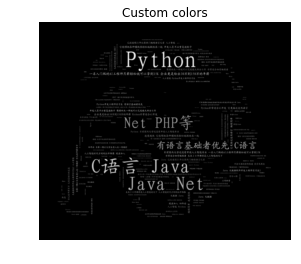

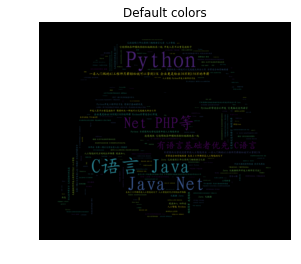

In [7]:
import urllib
import requests as rq
from selenium import webdriver
import re
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

job_demand_list = [] # 保存职位要求url
# 获得职位要求url
def download(url):
    driver = webdriver.Firefox()
    driver.get(url) #访问链接
    pagesource = driver.page_source
    driver.close() #关闭
    soup = BeautifulSoup(pagesource, "lxml")
    find_url = soup.find_all(class_="contentpile__content__wrapper__item__info")
    for tmp in find_url:
        job_demand_list.append(tmp['href'])
mylist = ["https://sou.zhaopin.com/?p="+str(i)+"&jl=489&kw=python&kt=3" for i in range(1, 13)]
for url1 in mylist:
    download(url1)
    
# 获取职位要求页面
def get_demand(url):
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
    request = urllib.request.Request(url, headers=header)
    request.add_header("Connection", "keep-live")
    response = urllib.request.urlopen(request)
    source = response.read().decode('utf-8')
    return source

# 保存要求
f = open('work_demand.txt','w',encoding='utf-8')    #文件操作符 文件句柄 文件操作对象
for url2 in job_demand_list:
    pagesource2 = get_demand(url2)
    soup2 = BeautifulSoup(pagesource2, "lxml")
    job_ask = soup2.find_all(class_="pos-ul")
    if job_ask[0].children:
        if job_ask[0].find_all('span'):
            for child in job_ask[0].find_all('span'):
                if child.string:
                    print(child.string)
                    f.write(child.string)
        elif job_ask[0].find_all('p'):
            for child in job_ask[0].find_all('p'):
                if child.string:
                    print(child.string)
                    f.write(child.string)
        elif job_ask[0].find_all('div'):
            for child in job_ask[0].find_all('div'):
                if child.string:
                    print(child.string)
                    f.write(child.string)
    else:
        for job_ask_info in job_ask[0]:
            if job_ask_info.string:
                print(job_ask_info.string)
                f.write(job_ask_info.string)
f.close() #关闭文件

# 绘制词云
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'work_demand.txt'), encoding='utf-8').read()

# pre-processing the text a little bit
text = text.replace("岗位职责", "").replace("电子信息", "").replace("电气", "").replace("岗位方向", "")
text = text.replace("任职要求", "").replace("计算机", "").replace("自动化", "").replace("测控", "").replace("岗位要求", "")
text = text.replace("软件工程", "").replace("网络", "").replace("机电", "").replace("生仪", "").replace("任职要求", "")
text = text.replace("这既是挑战", "").replace("又是机遇", "").replace("大专及以上学历", "").replace("数学或英语等专业", "")
text = text.replace("签订正式", "").replace("劳动合同", "").replace("交通补贴", "").replace("定期加薪", "")
text = text.replace("福利待遇", "").replace("定期团建", "").replace("员工旅游", "").replace("免费培训", "")
text = text.replace("免费宿舍", "").replace("交通补助", "").replace("薪资待遇", "").replace("本职位为日本工作职位", "")
text = text.replace("简历请写明日语等级", "").replace("职业背景", "").replace("温馨提示", "").replace("高级工程师", "")
text = text.replace("在薪酬待遇方面", "").replace("远高于其他程序员", "").replace("感谢配合", "").replace("工作地点", "")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,random_state=1, font_path="simkai.ttf").generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("zhaoping.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()